In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2, chi2_contingency

In [2]:
#stats.ttest_ind

In [3]:
df = pd.read_csv('Data/online_shoppers_intention.csv')
df.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
11240,0,0.00,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Nov,3,2,3,13,Returning_Visitor,False,False
7484,6,229.00,2,40.02,71,2576.432121,0.010270,0.045526,0.000000,0.0,Oct,1,1,2,1,Returning_Visitor,True,False
4718,0,0.00,0,0.00,20,248.416667,0.010526,0.033684,0.000000,0.8,May,2,2,2,13,Returning_Visitor,False,False
8733,3,99.75,0,0.00,31,835.583333,0.000000,0.006452,47.448508,0.0,Nov,2,2,1,10,Returning_Visitor,False,True
2625,5,168.00,0,0.00,31,1239.083333,0.006667,0.020000,0.000000,0.0,May,3,2,6,13,Returning_Visitor,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Group features based on data type

In [5]:
nums = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Revenue']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
        'VisitorType', 'Weekend', 'Revenue']
cats1= cats[:-1]

df_cstring = df[cats1].astype(str).copy()
df_cstring['Revenue'] = df['Revenue']

In [6]:
df_cstring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   OperatingSystems  12330 non-null  object
 1   Browser           12330 non-null  object
 2   Region            12330 non-null  object
 3   TrafficType       12330 non-null  object
 4   Month             12330 non-null  object
 5   VisitorType       12330 non-null  object
 6   Weekend           12330 non-null  object
 7   Revenue           12330 non-null  bool  
dtypes: bool(1), object(7)
memory usage: 686.5+ KB


## Feature Selection

<AxesSubplot:>

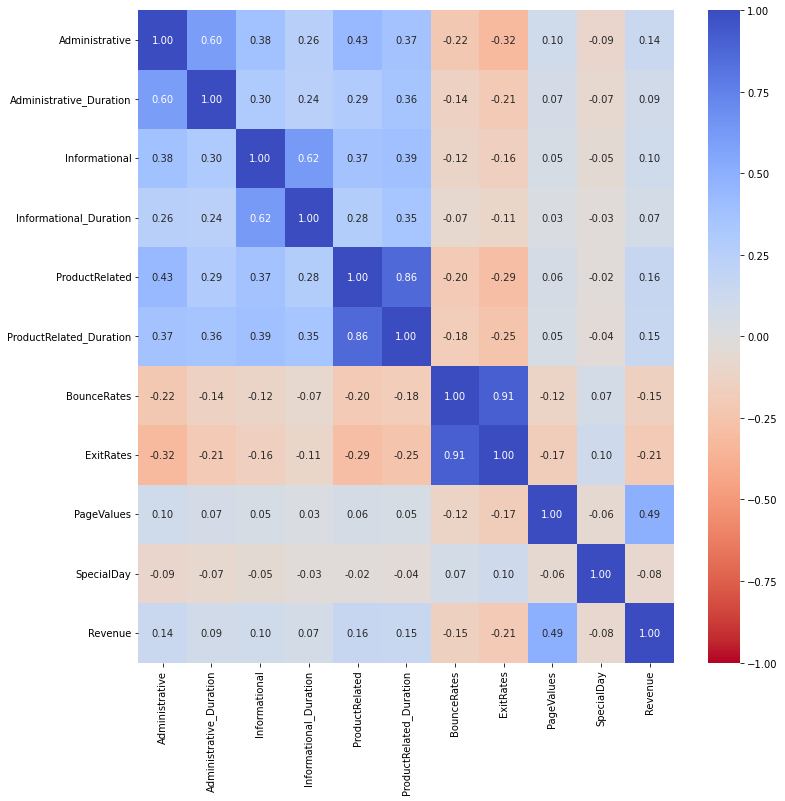

In [7]:
plt.figure(figsize=(12,12))
sns.heatmap(df[nums].corr(), cmap='coolwarm_r', annot=True, fmt='.2f',vmin=-1, vmax=1)

In [8]:
for c in cats :
    print (c)
    for r in cats :
        cont = pd.crosstab(df[c], df[r])
        X2, p, dof, expected = chi2_contingency(cont)
        if (p<=0.05) :
            stat = 'Dependent'
        else :
            stat = 'Independent'
        print (stat+'-'+c+'-'+r+'-'+str(p) )

OperatingSystems
Dependent-OperatingSystems-OperatingSystems-0.0
Dependent-OperatingSystems-Browser-0.0
Dependent-OperatingSystems-Region-7.29937210003443e-216
Dependent-OperatingSystems-TrafficType-0.0
Dependent-OperatingSystems-Month-2.4854990777589745e-40
Dependent-OperatingSystems-VisitorType-0.0
Dependent-OperatingSystems-Weekend-3.7508576266269806e-35
Dependent-OperatingSystems-Revenue-1.4160941129614401e-13
Browser
Dependent-Browser-OperatingSystems-0.0
Dependent-Browser-Browser-0.0
Dependent-Browser-Region-7.698462199597579e-284
Dependent-Browser-TrafficType-0.0
Dependent-Browser-Month-5.465866039834048e-61
Dependent-Browser-VisitorType-0.0
Dependent-Browser-Weekend-2.0550358006762103e-15
Dependent-Browser-Revenue-0.00608754317955109
Region
Dependent-Region-OperatingSystems-7.299372100033599e-216
Dependent-Region-Browser-7.698462199597579e-284
Dependent-Region-Region-0.0
Dependent-Region-TrafficType-3.515573427255576e-84
Dependent-Region-Month-8.133921799065182e-15
Dependent-Re

### Result
- Region tidak berpengaruh, di drop saja

### Question 
- Apakah antar feature harus diambil nilai p-value yang seperti apa?
- Bagaimana dengan nilai p-value 0 ?

## Feature Extraction

In [9]:
df['TotalPages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

df['TotalTime'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

In [10]:
nums = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','TotalPages','TotalTime','Revenue']

In [11]:
df[nums]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,TotalPages,TotalTime,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,0.000000,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,64.000000,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,0.000000,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,2.666667,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,10,627.500000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,56,1928.791667,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,5,465.750000,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,6,184.250000,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,19,421.000000,False


### Heat map after add Feature Extraction

<AxesSubplot:>

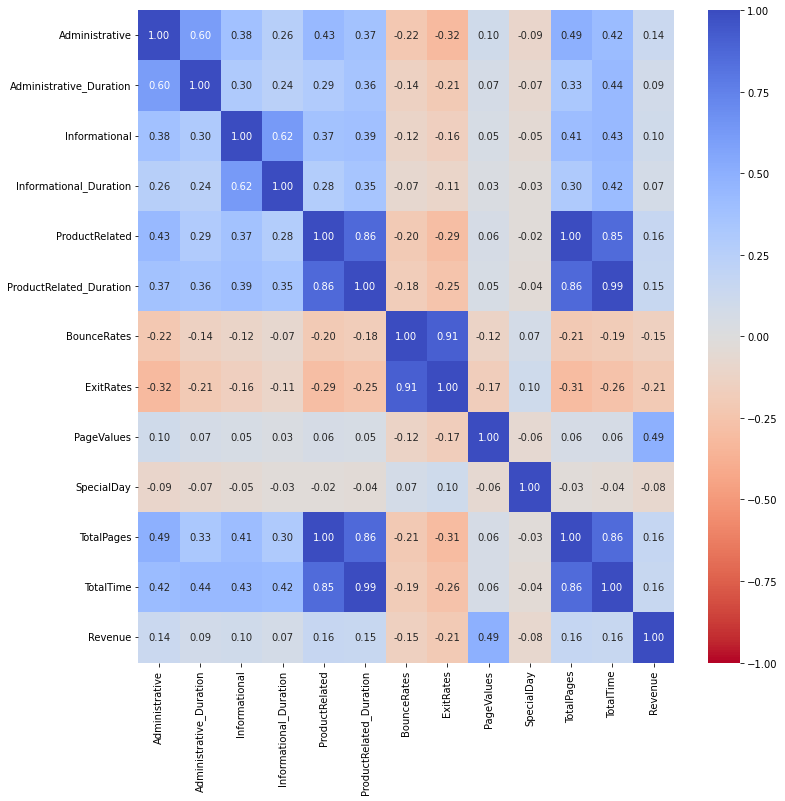

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df[nums].corr(), cmap='coolwarm_r', annot=True, fmt='.2f',vmin=-1, vmax=1)

### Result
- Penambahan Total Time dan Total Revenue, mempunyai korelasi yang tidak cukup signifikan, masih masuk kategori korelasi medium.

### Question
- Apakah perlu mengabungkan administrative dengan aadministrative duration, informational dengaan informational duration, product related  dan product related duration?

## 4 feature tambahan

- product type
- promo/discount
- Review of satisfaction
- payment option